In [1]:
# importando bibliotecas uteis em python:
import numpy as np
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from random import randint
from random import random

### Script para simular um perfil sintético gravimétrico. A fonte enterrada é uma esfera (fonte pontual) localizada nas coordenadas cartesianas (xc, zc) definidas pelo usuário.

### A equação que computa a componente vertical (z) da atração gravitacional produzida por uma fonte pontual é :
# $g_z = -G\frac{m (z-zc)}{((x-xc)^2 + (z-zc)^2)^{3/2}}$


In [2]:
# definindo as posicoes final e inicial do gravimetro em funcao das coordenadas do perfil sintetico:
min = randint(0,10) #Sorteando a posição inicial do Gravímetro.
max = randint(0,10) #Sorteando a posição final do Gravímetro.
if min > max:       #Caso o mínimo e o máximo estiverem trocados.
    min = max
    max = min
else:
    min = min
    max = max
if min == max:      #Caso o mínimo e o máximo forem iguais.
    min = randint(0,max)
    max = randint(min,10)
#print(min, max)

In [3]:
# definicao das coordenadas do perfil sintetico:
xmin = -100.0 # minimo do perfil
xmax = +100.0 # maximo do perfil
n = 50 # numero de pontos do perfil
x = np.linspace(xmin, xmax, n, endpoint= True ) # coordenadas x do perfil

# altura das medidas:
z = -10.0

In [4]:
# definicao das coordenadas do perfil sintetico via edson brain!
coord = list(range(10))   #Estou supondo 10 Gravímetros pois me parece um bom número para conferir o funcionamento do programa.
for n in range(0,10):
    coord[n] = (x[n],0)   #A coordenada z vai ser sempre 0, pois os Gravímetros estão na superfície.
#print (coord[0][1])

In [5]:
#DEFININDO ALGUMAS CONSTANTES
G = 6.674*(10**(-11)) # constante universal no SI:
si2mGal = 100000.0 # conversor de unidades
pi_edson = 3.1415 # não presi
pi = np.pi
#print ('pi_edson =', pi_edson, 'pi_python=', pi)

In [6]:
# Definicao das propriedades da fonte esferica:
xc = 0.0
zc = 150.0
raio = 20.0
rho = 2000.0
V = (4.0/3.0) * pi * raio**3 * rho
massa = V*rho
#print (V, massa)

In [7]:
#Definindo a funcao bolinha:
rmin = 0
rmax = 10
r = np.linspace(rmin,rmax,num=10,endpoint=True)
y = 2*pi*r

In [8]:
# calculo da componente vertical gz:
gz =  - G * massa * (z-zc) / ( (x-xc)**2 + (z-zc)**2 )**(3/2)
gz *= si2mGal
print (gz)
np.savetxt('TODO_021',gz,header='Dados da componente vertical de gz lido em cada posição do Gravímetro')

[21.30932905 22.04802382 22.79688728 23.55372948 24.31607111 25.08113802
 25.84586034 26.60687722 27.36054783 28.10296942 28.830003   29.53730709
 30.22037967 30.87460835 31.4953281  32.07788611 32.61771225 33.11039387
 33.55175289 33.93792319 34.26542572 34.53123904 34.73286268 34.86837109
 34.93645608 34.93645608 34.86837109 34.73286268 34.53123904 34.26542572
 33.93792319 33.55175289 33.11039387 32.61771225 32.07788611 31.4953281
 30.87460835 30.22037967 29.53730709 28.830003   28.10296942 27.36054783
 26.60687722 25.84586034 25.08113802 24.31607111 23.55372948 22.79688728
 22.04802382 21.30932905]


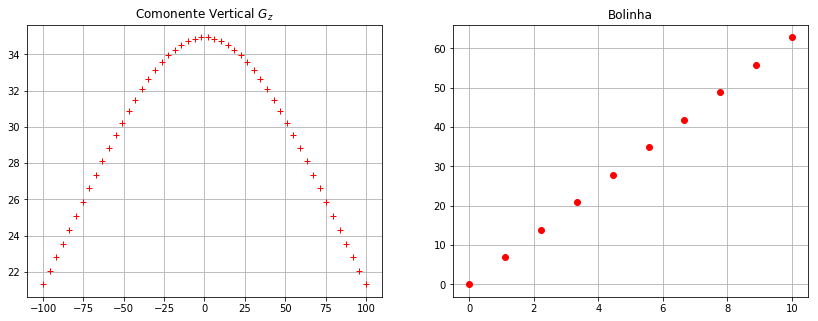

In [9]:
# plotando o resultado:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(x,gz,'r+')
plt.title('Comonente Vertical $G_z$')
plt.grid()
plt.subplot(1,2,2)
plt.plot(r,y,'ro')
plt.title('Bolinha')
plt.grid()
plt.savefig('TODO_022.jpeg')
plt.show()

## TODO:
##  1) Subplot com a bolinha, colocando o tamanho da bolinha em funcao do raio
##  2) Salvar a figura e o arquivo com os dados

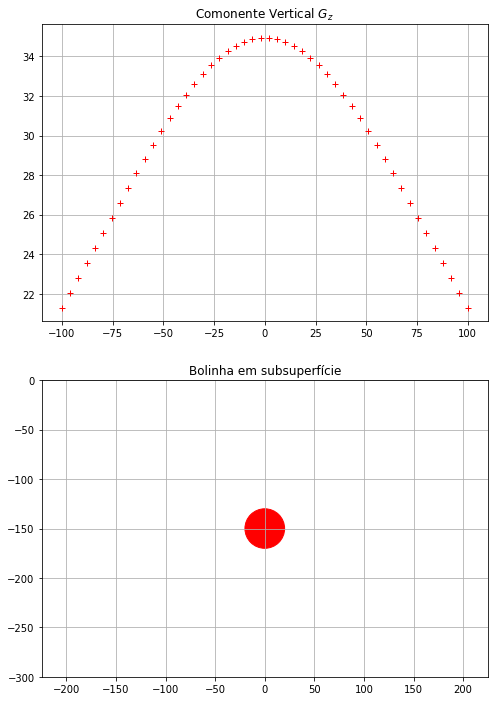

In [10]:
circle1=plt.Circle((xc,-zc),radius=raio,color = 'r')
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.plot(x,gz,'r+')
plt.title('Comonente Vertical $G_z$')
plt.grid()
plt.subplot(2,1,2)
plt.gcf().gca().add_artist(circle1)
plt.title('Bolinha em subsuperfície')
plt.grid()
plt.xlim((-xc-1.5*zc,xc+1.5*zc))
plt.ylim((-2*zc,0))
plt.savefig('TODO_023.jpeg')
plt.show()